## **HOMEWORK 1.2: Maze Navigation (DFS - Path Finding)** <br> <br>

Given a maze represented as a grid where 0s are open paths and 1s are walls, find if there's a path from the start position to the end position using DFS.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


#Create a maze as a grid (0 = open, 1  = wall)
maze = np.array([    
    [0, 0, 0, 1, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0]
])


In [3]:
#Convert the maze into a graph

def maze_to_graph(maze):
    rows, cols = maze.shape
    G = nx.Graph()

    for i in range(rows):
        for j in range(cols):
            if maze[i, j] == 0:
                #If the cell is open add it as a node
                G.add_node((i, j))

                #Check if the neighbors are open too and eventually create an edge
                for di, dj in [(-1, 0), (1, 0), (0, 1), (0, -1)]:
                    ni, nj = i + di, j + dj

                    #The index has to be into the maze and the cell has to be open
                    if 0 <= ni < rows and 0 <= nj < cols and maze[ni, nj] == 0:
                        G.add_edge((i, j), (ni, nj))
    return G

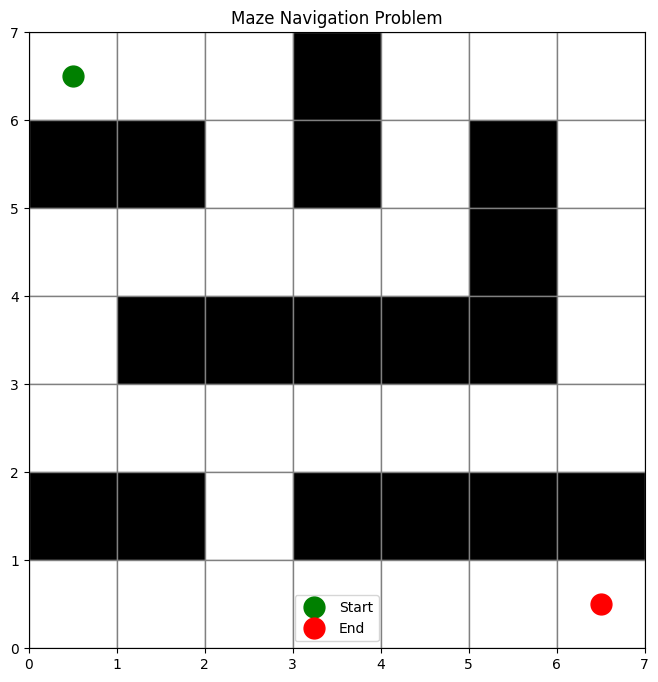

In [4]:
#Test the graph 

maze_graph = maze_to_graph(maze)

#Define the entry and the exit points
start = (0, 0)
end = (6, 6)

#Visualize the maze
plt.figure(figsize = (8, 8))
rows, cols = maze.shape

#Draw the maze grid:
for i in range(rows):
    for j in range(cols):
        color = 'white' if maze[i, j] == 0 else 'black'
        plt. fill([j, j + 1, j + 1, j], [rows - 1 - i, rows - 1 - i, rows - i, rows - i], color = color, edgecolor = 'gray')

# Mark start and end
plt.plot([0.5], [rows-0.5], 'go', markersize=15, label='Start')  # Start at (0,0)
plt.plot([cols-0.5], [0.5], 'ro', markersize=15, label='End')    # End at (6,6)

plt.xlim(0, cols)
plt.ylim(0, rows)
plt.gca().set_aspect('equal')
plt.title("Maze Navigation Problem")
plt.legend()
plt.show()

In [5]:
#Recursive DFS algorithm
def find_path_dfs(graph, start, end):
    visited = set()
    path = []

    def dfs(current):
        visited.add(current)
        path.append(current)

        if current == end:
            return True

        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                #Doing "dfs(neighbor)" is not enough: in order to have the correct output it's important to check every time
                if dfs(neighbor):
                    return True
        
        path.pop()
        return False
    
    if dfs(start):
        return path
    else:
        return None

Path found! Length: 17 steps
Path coordinates: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (5, 2), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


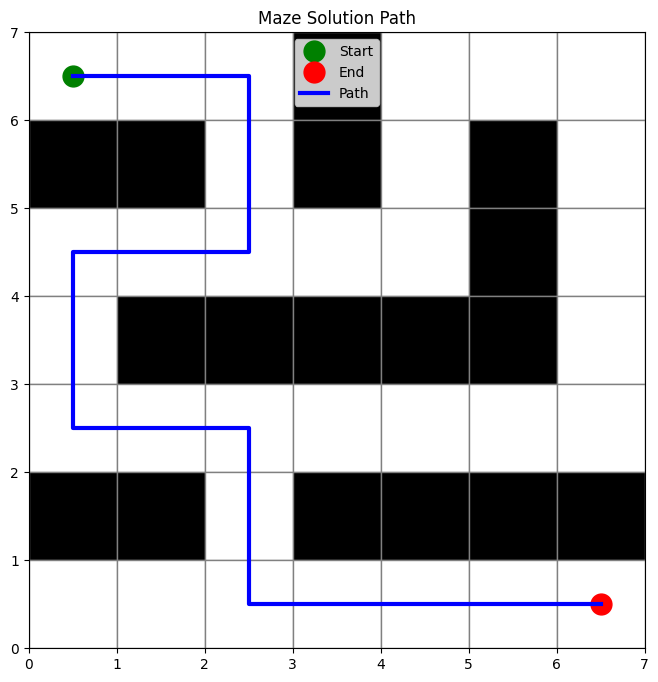

In [6]:
path = find_path_dfs(maze_graph, start, end)

if path:
    print(f"Path found! Length: {len(path)} steps")
    print("Path coordinates:", path)
    
    # Visualize the solution path
    plt.figure(figsize=(8, 8))
    
    # Draw the maze
    for i in range(rows):
        for j in range(cols):
            color = 'white' if maze[i, j] == 0 else 'black'
            plt.fill([j, j+1, j+1, j], [rows-1-i, rows-1-i, rows-i, rows-i], color=color, edgecolor='gray')
    
    # Mark start and end
    plt.plot([0.5], [rows-0.5], 'go', markersize=15, label='Start')
    plt.plot([cols-0.5], [0.5], 'ro', markersize=15, label='End')
    
    # Draw the path
    if path:
        path_x = [p[1] + 0.5 for p in path]
        path_y = [rows - 1 - p[0] + 0.5 for p in path]
        plt.plot(path_x, path_y, 'b-', linewidth=3, label='Path')
    
    plt.xlim(0, cols)
    plt.ylim(0, rows)
    plt.gca().set_aspect('equal')
    plt.title("Maze Solution Path")
    plt.legend()
    plt.show()
else:
    print("No path found through the maze!")